<div class = "alert alert-danger" ><b> Dependencies </b><br>
If you want to run this IPython notebook locally, you'll need to install the PyMC.  If you are running the Anaconda Python distribution you can install a PyMC using the conda utility:

``conda install -c anaconda pymc``.
</div> 

In [1]:
import pymc as pymc
print(pymc.__version__)

2.3.6


# The formula

$$ P(H | E) = \frac{P(E | H)P(H)}{P(E)}$$

Bayesian statistics interprets probabilities as measures of believability (how confident we are) in an event, not as the long-run frequency of events.

Beliefs mesaures are applied to individuals, not to nature, so there is room for conflicting belives among individuals. Different beliefs are not intepreted as errors but as different states of knowledge about an event. 

The formula is interpreted as an updating of belief after observing data.

## Subjectivity

Andrew Gelman (professor of statistics and political science and director of the Applied Statistics Center at Columbia University):
> Bayesian methods are often characterized as “subjective” because the user must choose a prior distribution, that is, a mathematical expression of prior information. The prior distribution requires information and user input, that’s for sure, but I don’t see this as being any more “subjective” than other aspects of a statistical procedure, such as the choice of model for the data (for example, logistic regression) or the choice of which variables to include in a prediction, the choice of which coefficients should vary over time or across situations, the choice of statistical test, and so forth. Indeed, Bayesian methods can in many ways be more “objective” than conventional approaches in that Bayesian inference, with its smoothing and partial pooling, is well adapted to including diverse sources of information and thus can reduce the number of data coding or data exclusion choice points in an analysis. 


# Bayesian Data Analysis

### Probabilities: Bayesianism.


Let's now imagine the following scenario. We want to know the *probability* of getting the Oscar for the last film we have produced. In this case, the *frequentist* notion of **series of trials** is not well defined: every year the situation is different, there are no series of identical trials to consider. We can conclude that the classical notion of probability does not apply to this situations.

But **Bayesianism** defines probability in a different way: **the degree of belief that an event will occur**.

What is the probability that Osama Bin Laden is dead? For a frequentist there is no probability for this event because there are no possible trials (Bin Laden is dead or is not, it's not a question of probability). A Bayesianist would assign a probability to this event based on her **state of knowledge**. The state of knowledge changes when new information is available. 

## The Bayes rule

The main tool of Bayesian Analysis is the Bayes theorem, presented in 1763:

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

<b> Bayes Theorem </b> <br>
$$ P(A | B) = \frac{P(B | A)P(A)}{P(B)}$$
</div>   


This theorem describes the relationship between the conditional probabilities of two events.

It is easy to show that this is true. It's only basic arithmetic:

+ We know that $ P(A \mbox{ and } B) = P(A)P(B | A) $.
+ But it also true that $ P(A \mbox{ and } B) = P(B)P(A | B)$.
+ So, $ P(A)P(B | A) = P(B)P(A | B)$. 

Although this is called Bayes’ theorem, the general form of it as stated here was actually first written down not by Bayes, but by Laplace. What Bayes did was derive the special case of this formula for “inverting” the binomial distribution. 

### Hypotheses and evidences.

The most common interpretation of Bayes's Theorem is based in considering that $A$ is an hypothesis $H$ and $B$ a new evidence $E$ that should modify our belief in $H$:

$$P(H | E) = P(H) \frac{P(E|H)}{P(E)}$$

This is called the **diachronic interpretation** because it describes how *an hypothesis must be updated over time every time a new evidence is found*. 


+ $P(H | E)$ is called the **posterior**.
+ $P(H)$ is called the **prior probability** of the hypothesis.
+ $P(E | H)$ is called the **likelihood** of the evidence.
+ $P(E)$ is a normalizing constant. If there are $n$ hypotheses that are *mutually exclusive* and *collectivelly exahustive*, we can compute $P(E)$ as:

$$ P(E) = P(H_1)P(E|H_1) + \dots + P(H_n)P(E|H_n)$$


In general, $P(H | E), P(H), P(E|H), P(E)$ are functions! We can extract point estimates, set estimates and probabilistic propositions from $P(H | E)$.

### Visualization of the Bayes Rule<br>

Say $P(H_{yes})=5\%$ is the prevalence of a disease (% of red dots on top fig). 

Each individual is given a test with accuracy $P(E_{yes}|H_{yes})=P(E_{no}|H_{no}) = 90\%$.  

<img src="images/bayes.gif" style="width: 600px;">

We want to know the **probability of having the disease if you tested positive**: $Pr(H_{yes}|E_{yes})$. 

We can use the Bayes rule to compute this posterior:

$$ P(H_{yes}|E_{yes}) = \frac{P(H_{yes}) P(E_{yes}|H_{yes}) }{P(E_{yes})} 
= \frac{P(H_{yes})P(E_{yes}|H_{yes}) }{P(H_{yes})P(E_{yes}|H_{yes}) + P(H_{no})P(E_{yes}|H_{no})} $$
$$= \frac{0.05 \times 0.9}{0.05 \times 0.9 + 0.95 \times 0.1} \approx 0.32$$

Many find it counterintuitive that this probability is much lower than $90\%$; this animated gif is meant to help.

The O in the middle turns into an X when the test fails. The rate of Xs is $1-Pr(E_{yes}|H_{yes})$. 

### Monty Hall Problem

> "*Let's Make a Deal*" is a television game show which originated in the United States and has since been produced in many countries throughout the world. The show is based around deals offered to members of the audience by the host. The traders usually have to weigh the possibility of an offer for valuable prizes, or undesirable items, referred to as "Zonks". 

>*Source: Wikipedia*.

<center><img src="images/lets.jpg"></center>

Monty Hall was the original host of the game. The Monty Hall problem is based on one of the regular games of the show. It is a stick or switch problem:
> Suppose you're on the game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats.
> You pick a door, say Door A (the door is not open), and the host, who knows what's behind the doors, opens Door B, which has a goat.
> He then says to you, "Do you want to pick Door C?" Is it to your advantage to switch your choice?
> *Source: Wikipedia*

Most people intuitively thinks that it makes no difference to stick or to switch, but this is wrong!
The truth is that if you stick the probability of winning is 1/3; if you switch your chances are 2/3.

We can use the Bayesian point of view to solve this problem. At the beginning, there are different hypotheses $H$ with their corresponding **prior** probabilities:

+ A: the car is behind Door A; $P(H=\mbox{'A'}) = 1/3$
+ B: the car is behind Door B; $P(H=\mbox{'B'}) = 1/3$
+ C: the car is behind Door C; $P(H=\mbox{'C'}) = 1/3$

You choose A randomly. If you stick to A after Monty opens the door B (this a our evidence *E*). We can compute  $P(H=\mbox{'A'}|E)$:

$$ P(H=\mbox{'A'}|E) = \frac{P(H=\mbox{'A'})P(E|H=\mbox{'A'})}{P(E)} $$
$$= \frac{1/3 \times 1/2}{1/3 \times 1/2 + 1/3 \times 0 + 1/3 \times 1} = 1/3$$ 

The denominator can be understood in this way: We are assuming we initially chose A. It follows that if the car is behind A, Monty will show us a goat behind B half the time. If the car is behind B, Monty never shows us a goat behind B. Finally, if the car is behind C, Monty shows us a goat behind B every time. 

**What is the probability if we switch?**

To know $P(H=\mbox{'C'}|E)$ you could also apply Bayes's Theorem directly, but there is a simpler way to compute it:  Since the probability that it's behind A is 1/3 and the sum of the two probabilities must equal 1, the probability the car is behind C is 1−1/3=2/3. 


Samuel Arbesman, Wired, 11.26.14: 

> In fact, Paul Erdős, one of the most prolific and foremost mathematicians involved in probability, when initially told of the Monty Hall problem also fell victim to not understanding why opening a door should make any difference. Even when given the mathematical explanation multiple times, he wasn’t really convinced. It took several days before he finally understood the correct solution.

Let's make a ** simulation ** of the game to compute $P(H=\mbox{'C'}|E)$:

In [2]:
import random

iterations = 100000
doors = ["goat"] * 2 + ["car"]
change_wins = 0
change_loses = 0

for i in range(iterations):
    random.shuffle(doors)
    
    # you pick door n:
    n = random.randrange(3)
    
    # monty picks door k, k!=n and doors[k]!="car"
    sequence = list(range(3))
    random.shuffle(sequence)
    for k in sequence:
        if k == n or doors[k] == "car":
            continue
    
    # now if you change, you lose iff doors[n]=="car"
    if doors[n] == "car":
        change_loses += 1
    else:
        change_wins += 1

perc = (100.0 * change_wins) / (change_wins + change_loses)
print("Switching has %s wins and %s losses: you win %.1f%% of the time" % (change_wins, change_loses, perc))

Switching has 66443 wins and 33557 losses: you win 66.4% of the time


### Exercise 

Compute $P(H=\mbox{'C'}|E)$ by applying Bayes' Rule and check the result.

In [3]:
# your solution here

P = 0
print(P)

0


### Exercise

**What is the evidence of a disease after a clinical test?**

1% of women at age forty who participate in routine screening have breast cancer. 80% of women with breast cancer will get positive mammographies. 9.6% of women without breast cancer will also get positive mammographies. A woman in this age group had a positive mammography in a routine screening.

- **What is the probability that she actually has breast cancer?**

- **Is this a "good" test for detecting breast cancer?**

This simple puzzle is not all that simple in practice. Only 15% of doctors, when presented with this situation, come up with the correct answer.

The data:

+ $P(\mbox{cancer}) = 0.01$ and $P(\mbox{no cancer}) = 0.99$.
+ If you get $+$, then $P(\mbox{ + } | \mbox{ cancer}) = 0.8$ and $P(\mbox{ + } | \mbox{ no cancer}) = 0.096$.
+ If you get $-$, then $P(\mbox{ - } | \mbox{ cancer}) = 0.2$ and $P(\mbox{ - } | \mbox{ no cancer}) = 0.904$.

Let's give an answer to the second question. The answer can be given by comparing $P(\mbox{cancer }|\mbox{ + })$ and $P(\mbox{no cancer }|\mbox{ + })$:

$$ P(\mbox{cancer }|\mbox{ + }) \propto P(\mbox{cancer}) P(\mbox{ + } | \mbox{ cancer}) = 0.008$$

$$ P(\mbox{no cancer }|\mbox{ + }) \propto P(\mbox{no cancer}) P(\mbox{ + } | \mbox{ no cancer}) = 0.09504$$

Obviously, this is not a good test!

** What is the probability that she actually has breast cancer? ** Remember that:

$$P(E) = \sum_i P(H_i) p (E | H_i)$$

In [ ]:
# Your solution here.

### Exercise
Let's suppose that the result of a second test for a given woman *is independent* from the first one (this is clearly a wrong assumption!). What is the probability of cancer after a positive in a second test?

In [ ]:
# Your solution here.

P2 = 0
print(P2)

## Bayesian Estimation


**The locomotive problem.**

> **Problem definition**: A railroad numbers its locomotives in order $1 \dots N$. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

> During World War II, the *Economic Warfare Division* of the American Embassy in London used statistical analysis to estimate German production of tanks and other equipment.
The Western Allies had captured log books, inventories, and repair records that included chassis and engine serial numbers for individual tanks.

> Analysis of these records indicated that serial numbers were allocated by manufacturer and tank type in blocks of 100 numbers, that numbers in each block were used sequentially, and that not all numbers in each block were used. So the problem of estimating German tank production could be reduced, within each block of 100 numbers, to a form of the locomotive problem.

> Based on this insight, American and British analysts produced estimates substantially lower than estimates from other forms of intelligence. And after the war, records indicated that they were substantially more accurate.

> *(Source: http://greenteapress.com/thinkbayes/html/thinkbayes004.html#toc24)*

Based on the observation, we know the railroad has 60 or more locomotives. But how many more? 

To apply Bayesian reasoning, we can break this problem into two steps:

+ What did we know about $N$ before we saw the data?
+ For any given value of $N$, what is the likelihood of seeing the data (a locomotive with number 60)?

The answer to the first question is the **prior**. The answer to the second is the **likelihood**.

We don’t have much basis to choose a prior, but we can start with something simple and then consider alternatives. Let’s assume that $N$ can be any value from 1 to 1000 and a flat prior.

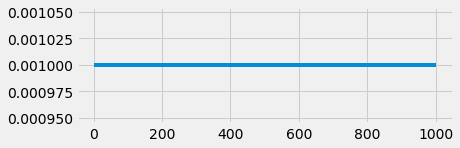

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

hypos = np.array(range(1, 1001))
priors = np.array([1.0/len(hypos) for hypo in hypos])

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.plot(hypos, priors)
plt.show()

Now all we need is a **likelihood function**, $P(E|H)$. 

In a hypothetical fleet of $N$ locomotives, what is the probability that we would see number 60? 

If we assume that there is only one train-operating company (or only one we care about) and that we are equally likely to see any of its locomotives, then the chance of seeing any particular locomotive is $1/N$ and that there are at least $N$ locomotives.

In [5]:
def Likelihood(data, hypo):
    if hypo < data:
        return 0.0
    else:
        return 1.0/hypo

Let's plug our data into the model:

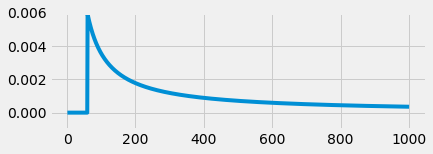

In [6]:
def Posterior(data, hypos, priors):
    import numpy as np
    posterior = np.array([Likelihood(data, hypo) for hypo in hypos]) * priors
    return posterior

# After an update, the distribution is no longer normalized, 
# but because these hypotheses are mutually exclusive and 
# collectively exhaustive, we can renormalize.

def Normalize(d):
    total = d.sum()
    factor = 1.0 / total
    for i in range(len(d)):
        d[i] *= factor
    return d

posterior = Normalize(Posterior(60, hypos, priors))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.006])
    plt.plot(hypos, posterior)
plt.show()

The most likely value, if you had to guess, is 60. That might not seem like a very good guess; after all, what are the chances that you just happened to see the train with the highest number?

Nevertheless, if you want to maximize the chance of getting the answer exactly right, you should guess 60.

But maybe that’s not the right goal. An alternative is to compute the hypothesys that corresponds to the mean of the posterior distribution = 333.

In [7]:
def Meanp(hypos, posterior):
    total = 0.0
    s = hypos * posterior
    return s.mean()

print(int(Meanp(hypos, posterior)*len(hypos)))

333


If we want to increse our knowledge, there are two ways to proceed:

+ Get more data.
+ Get more background information.

For example, suppose that in addition to train 60 we also see trains 30 and 90. 

164


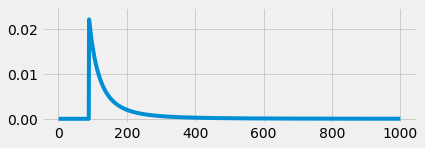

In [8]:
hypos = range(1, 1001)
posterior =  Normalize(Posterior(60, hypos, priors))
posterior2 = Normalize(Posterior(30, hypos, posterior))
posterior3 = Normalize(Posterior(90, hypos, posterior2))

print(int(Meanp(hypos, posterior3)*len(hypos)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.025])
    plt.plot(hypos, posterior3)
plt.show()

We can refactor our functions in the following way:

Mean of the posterior distribution with 1000 hypotheses:  164


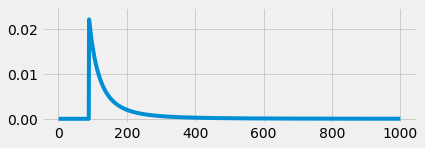

In [9]:
def Normalize(d):
    total = d.sum()
    factor = 1.0 / total
    for i in range(len(d)):
        d[i] *= factor
    return d

def Likelihood1(datum, hypo):
    if hypo < datum:
        return 0.0
    else:
        return 1.0/hypo
    
def Posterior(datum, hypos, priors, likelihood):
    import numpy as np
    posterior = np.array([likelihood(datum, hypo) for hypo in hypos]) * priors
    return posterior

def Posterior_n(data, hypos, priors, likelihood):
    p = priors
    for d in data:
        posterior =  Normalize(Posterior(d, hypos, p, likelihood))
        p = posterior
    return posterior

def Meanp(hypos, posterior):
    total = 0.0
    s = hypos * posterior
    return s.mean()

hypos = np.array(range(1, 1001))
priors = np.array([1.0/len(hypos) for hypo in hypos])
posteriors = Posterior_n([60,30,90], hypos, priors, Likelihood1)

print('Mean of the posterior distribution with 1000 hypotheses: ', \
        int(Meanp(hypos, posteriors)*len(hypos)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.025])
    plt.plot(hypos, posteriors)
plt.show()

With more data, **posterior distributions based on different priors tend to converge**. 

In [10]:
hypos = np.array(range(1, 501))
priors = np.array([1.0/len(hypos) for hypo in hypos])
posteriors = Posterior_n([60,60,90], hypos, priors, Likelihood1)
print('Mean of the posterior distribution with 500 hypotheses: ', 
      int(Meanp(hypos, posteriors)*len(hypos)))

hypos = np.array(range(1, 2001))
priors = np.array([1.0/len(hypos) for hypo in hypos])
posteriors = Posterior_n([60,60,90], hypos, priors, Likelihood1)
print('Mean of the posterior distribution with 2000 hypotheses: ', 
      int(Meanp(hypos, posteriors)*len(hypos)))

Mean of the posterior distribution with 500 hypotheses:  151
Mean of the posterior distribution with 2000 hypotheses:  171


If more data are not available, another option is to improve the priors by gathering more background information. It is probably not reasonable to assume that a train-operating company with 1000 locomotives is just as likely as a company with only 1.

Let's suppose that the distribution of the total number of locomotives of a company tends to follow a power law. This law suggests that if there are 1000 companies with fewer than 10 locomotives, there might be 100 companies with 100 locomotives, 10 companies with 1000, and possibly one company with 10,000 locomotives.

Mathematically, a power law means that the number of companies with a given size is inversely proportional to size:

$$ f(x) = \left( \frac{1}{x} \right)^\alpha $$

where $f(x)$ is the probability mass function of $x$ and $\alpha$ is a parameter (that is often near 1).

133


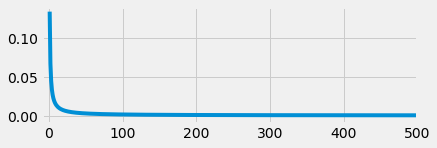

In [11]:
def Likelihood2(data, hypo, alpha=1.0):
    if hypo < data:
        return 0.0
    else:
        return hypo**(-alpha)

alpha = 1.0
hypos = np.array(range(1, 1001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

print(int(Meanp(hypos, priors)*len(hypos)))
    
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.01,0.14])
    plt.xlim([-10,500])
    plt.plot(hypos, priors)
plt.show()

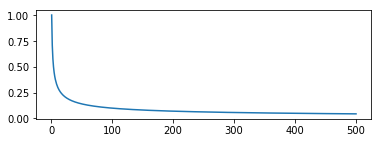

<function __main__.power>

In [12]:
from IPython.html.widgets import interact
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

def power(x,alpha):
    plt.figure(figsize=(6,2))
    plt.plot([i for i in range(1,x)],[i**(-alpha) for i in range(1,x)])

v = interact(power, x = (1,1001), alpha =(0.1,0.9))
display(v)

Mean of the posterior distribution with 1000 hypotheses:  133


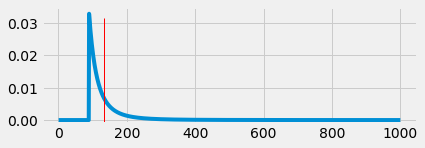

In [13]:
alpha = 1.0

hypos = np.array(range(1, 1001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)

print('Mean of the posterior distribution with 1000 hypotheses: ', int(Meanp(hypos, posteriors)*len(hypos)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.035])
    plt.plot(hypos, posteriors)
    plt.axvline(x=int(Meanp(hypos, posteriors)*len(hypos)), ymin=0.0, ymax = 0.9, \
                linewidth=1, color='r')

plt.show()

Mean of the posterior distribution with 500 hypotheses:  130


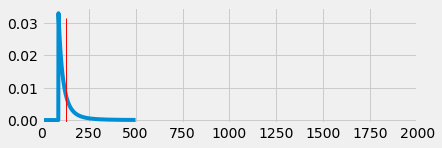

Mean of the posterior distribution with 2000 hypotheses:  133


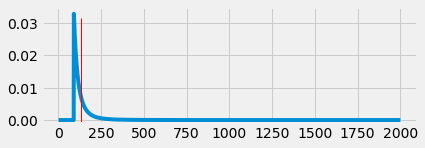

In [14]:
hypos = np.array(range(1, 501))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)

print('Mean of the posterior distribution with 500 hypotheses: ',int(Meanp(hypos, posteriors)*len(hypos)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.035])
    plt.xlim([0,2000])
    plt.plot(hypos, posteriors)
    plt.axvline(x=int(Meanp(hypos, posteriors)*len(hypos)), ymin=0.0, ymax = 0.9, \
                linewidth=1, color='r')

plt.show()

hypos = np.array(range(1, 2001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))

posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)

print('Mean of the posterior distribution with 2000 hypotheses: ',int(Meanp(hypos, posteriors)*len(hypos)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6,2))
    plt.ylim([-0.001,0.035])
    plt.plot(hypos, posteriors)
    plt.axvline(x=int(Meanp(hypos, posteriors)*len(hypos)), ymin=0.0, ymax = 0.9, \
                linewidth=1, color='r')

plt.show()

## MAP and credible intervals

Once we have the **posterior distribution** we could be interested in summarizing the result with a **point estimate** or a **credible interval**.

For point estimates we can use, the mean, the median or the **mode**. This last estiamte is called **maximum a posteriori estimate (MAP)**.

For intervals we usually report two values computed so that there is a 95% chance that the unknown value falls between them (or any other probability). These values define a **credible interval**.

A simple way to compute a credible interval is to add up the probabilities in the posterior distribution and record the values that correspond to probabilities 2.5% and 97.5%. In other words, the 2.5th and 97.5th percentiles.

The credible interval is [ 90 , 303 ]


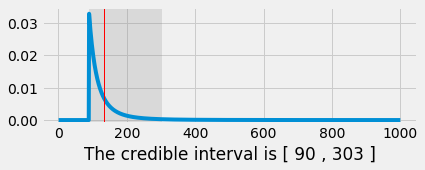

In [15]:
def Percentile(hypos, posterior, percentage):
    import numpy as np
    p = percentage / 100.0
    cdf = np.cumsum(np.array(posterior))
    total = 0
    for i in range(len(hypos)):
        total += posterior[i]
        if total >= p:
            return hypos[i] 

alpha = 1.0

hypos = np.array(range(1, 1001))
priors = Normalize(np.array([Likelihood2(0, hypo, alpha) for hypo in hypos]))
posteriors = Posterior_n([30,60,90], hypos, priors, Likelihood2)      

print('The credible interval is [', Percentile(hypos, posteriors, 2.5),',', \
            Percentile(hypos, posteriors, 97.5), ']')

with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(6,2))
    ax = fig.add_subplot(111)
    plt.ylim([-0.001,0.035])
    plt.plot(hypos, posteriors)
    plt.axvspan(Percentile(hypos, posteriors, 2.5), Percentile(hypos, posteriors, 97.5), facecolor='0.5', alpha=0.2)
    plt.axvline(x=int(Meanp(hypos, posteriors)*len(hypos)), ymin=0.0, ymax = 1, \
                linewidth=1, color='r')
    ax.set_xlabel('The credible interval is [ 90 , 303 ]')
plt.show()

For the previous example—the locomotive problem with a power law prior and three trains—the 90% credible interval is (90, 303). The width of this range suggests, correctly, that we are still quite uncertain about how many locomotives there are.

## Model comparison.

From a frequentist point of view, we say that an effect $H_A$ is statistically significant (or not) by computing the chances (likelihood) of the effect under a null hypothesis $P(E|H_0)$, but you can't conclude it is real.

From a Bayesian point of view what we directly compute $P(H_A | E)$, where $H_A$ is the hypothesis the effect is real. 

By Bayes's Theorem:

$$ P(H_A | E) = \frac{P(E|H_A) P(H_A)}{P(E)} = \frac{P(E|H_A) P(H_A)}{P(E | H_A)P(H_A) + P(E | H_0)P(H_0)} $$

To compute $P(E | H_A)$, the likelihood term, we can follow a similar approach to the one employed to compute $P(E | H_0)$ (that was 0.02 for clean data), by generating 1000 sample pairs, one from each distribution.

In [17]:
import pandas as pd
import random
import numpy as np

file = open('files/2002FemPreg.dat', 'r')

def chr_int(a):
    if a == '  ':
        return 0
    else:
        return int(a)
        
preg=[]
for line in file:
    lst  = [int(line[:12]), int(line[274:276]), int(line[276]), \
                 chr_int(line[277:279]), float(line[422:440])]
    preg.append(lst)
    

df = pd.DataFrame(preg)
df.columns = ['caseid', 'prglength', 'outcome', 'birthord', 'finalwgt']

#data cleaning
df2 = df.drop(df.index[(df.outcome == 1) & (df['prglength'] > df['prglength'].median() + 6)])
df2[(df2.outcome == 1) & 
    (df2['prglength'] > df2['prglength'].median() + 6)]
df3 = df2.drop(df2.index[(df2.outcome == 1) &
                         (df2['prglength'] < df2['prglength'].median() -10)])
df3[(df3.outcome == 1) & 
    (df3['prglength'] < df3['prglength'].median() - 10)]

firstbirth = df3[(df3.outcome == 1) & (df3.birthord == 1)]
othersbirth = df3[(df3.outcome == 1) & (df3.birthord >= 2)]

x = firstbirth['prglength']
y = othersbirth['prglength']
p = abs(x.mean() - y.mean())
N = 1000
diff = list(range(N))
for i in range(N):
    p1 = [random.choice(x.values) for _ in range(len(x))]
    p2 = [random.choice(y.values) for _ in range(len(y))]
    diff[i] = abs(np.mean(p1)-np.mean(p2))
diff2 = np.array(diff)
w1 = np.where(diff2 > p)[0]
print('p-value =', len(w1)/float(N), '(', len(w1)/float(N)*100 ,'%)', 
      'Difference =', p)

p-value = 0.511 ( 51.1 %) Difference = 0.10393095586685774


Then, the probability of $P(E | H_A)$ is around 0.5. 

In absence of knowledge, $P(H_A) = 0.5$. Then, we can compute the posterior probabilities of $H_A$ and $H_0$:

$$ P(H_A | E) = \frac{P(E|H_A) P(H_A)}{P(E)}$$

$$ P(H_0 | E) = \frac{P(E|H_0) P(H_0)}{P(E)}$$


In [18]:
print('P(H_A|E):', 0.5 * 0.5 / (0.5 * 0.5 + 0.02 * 0.5))
print('P(H_0|E):', 0.02 * 0.5 / (0.5 * 0.5 + 0.02 * 0.5))

P(H_A|E): 0.9615384615384615
P(H_0|E): 0.038461538461538464


So, by taking into account a new evidence we have increased our belief in the effect $H_A$ from 50% to 96%. This is not a decision rule but a change in our knowledge. It makes sense: the evidence supports the hypothesis!

In our problem, based on expert knowledge, it could also make sense to consider that $P(H_A) = 0.01$ and $P(H_0) = 0.99$. In this case:

In [19]:
print('H_A:', 0.5 * 0.01 / (0.5 * 0.01 + 0.02 * 0.99))
print('H_0:', 0.02 * 0.99 / (0.5 * 0.01 + 0.02 * 0.99))

H_A: 0.20161290322580644
H_0: 0.7983870967741935


We have increased our belief in the effect $H_A$ from 1% to 20%, but we still can believe in $H_0$!

The change strongly depends on our prior belief: <br><br>

<center><img src="files/images/p-graphic.jpg"></center>

<center><small>From: Sellke et al. "Calibration of ρ values for testing precise null hypotheses." Am. Stat. 55.1 (2001): 62-71.</small></center>

## Bayesian analysis of a parameter.

(from *Bayesian Methods for Hackers, Cam Davidson-Pilon, 2013*)

Suppose, naively, that you are unsure about the probability of heads in a coin flip. You believe there is some true underlying ratio, call it $p$, but have no prior opinion on what $p$ might be.

We begin to flip a coin, and record the observations: either ``H`` or ``T``. This is our observed data. 

An interesting question to ask is how our inference changes as we observe more and more data? More specifically, **what do our posterior probabilities look like when we have little data, versus when we have lots of data**?

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

> In probability theory and statistics, the Bernoulli distribution, named after Swiss scientist Jacob Bernoulli, is the probability distribution of a random variable which takes value 1 with success probability $p$ and value 0 with failure probability $q=1-p$. 

> The probability mass function $f$ of this distribution is $ \mbox{ } f(k;p) = \begin{cases} p & \text{if }k=1, \\[6pt]
1-p & \text {if }k=0.\end{cases} $

> *Source: Wikipedia*

 

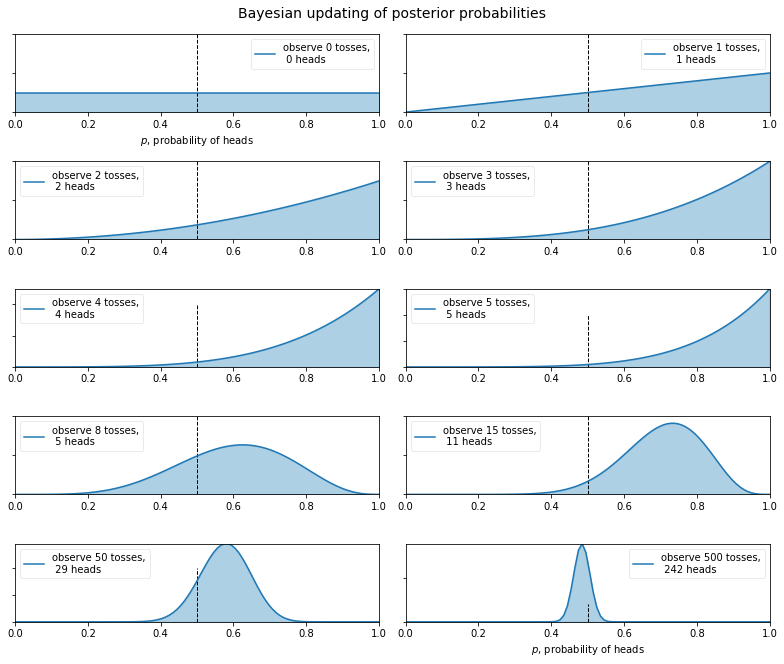

In [21]:
%matplotlib inline

import matplotlib.pylab as plt
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
figsize(11, 9)

# we use a (continous) prior for p by using the beta function
dist = stats.beta

n_trials = [0,1,2,3,4,5,8,15, 50, 500]

# random number generation with a Bernoulli distribution with p=0.5
data = stats.bernoulli.rvs(0.5, size = n_trials[-1] )

x = np.linspace(0,1,100)

for k, N in enumerate(n_trials):
    sx = plt.subplot( len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") if k in [0,len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    
    # counting the number of heads
    heads = data[:N].sum()
    
    # computing the posterior
    y = dist.pdf(x, 1 + heads, 1 + N - heads )
    
    plt.plot( x, y, label= "observe %d tosses,\n %d heads"%(N,heads) )
    plt.fill_between( x, 0, y, color="#348ABD", alpha = 0.4 )
    plt.vlines( 0.5, 0, 4, color = "k", linestyles = "--", lw=1 )
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight = True)

plt.suptitle( "Bayesian updating of posterior probabilities", y = 1.02, fontsize = 14);
plt.tight_layout()


In this example we have used a prior that was represented with a Beta function, a very special function that have allowed us to update the posterior in a very straighforward way! 

> In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval $[0, 1]$ parametrized by two positive shape parameters, denoted by $\alpha$ and $\beta$, that appear as exponents of the random variable and control the shape of the distribution.

> *Source: Wikipedia*

The Beta function is very flexible for representing very different priors, but more important, prior and posterior are **conjugate**, meaning that they belong to the same family.

Given a $Beta(\alpha, \beta)$ and data $(H,T)$, the posterior is $Beta(\alpha+H, \beta+T)$.

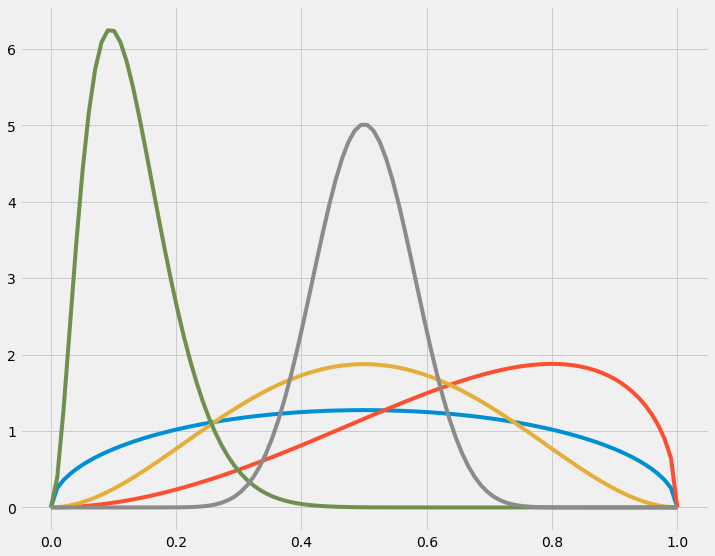

In [22]:
x = np.linspace(0,1,100)
dist = stats.beta

with plt.style.context('fivethirtyeight'):
    y = dist.pdf(x, 1.5, 1.5)
    plt.plot(x,y)
    y = dist.pdf(x, 3.0, 1.5)
    plt.plot(x,y)
    y = dist.pdf(x, 3.0, 3.0)
    plt.plot(x,y)
    y = dist.pdf(x, 3.0, 20.0)
    plt.plot(x,y)
    y = dist.pdf(x, 20.0, 20.0)
    plt.plot(x,y)
plt.show()

## Reminder: Popular PDF's
*(Source: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers*)

Let $Z$ be some random variable. Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve.

### Discrete Case

If $Z$ is discrete, then its distribution is called a *probability mass function*, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. 

There are a lot of popular probability mass functions, but let's introduce the first very useful probability mass function. We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

It can express the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event.

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

This property is often used, so it's useful to remember. Below, we plot the probability mass distribution for different $\lambda$ values. 

Text(0.5,1,'Probability mass function of a Poisson random variable; differing $\\lambda$ values')

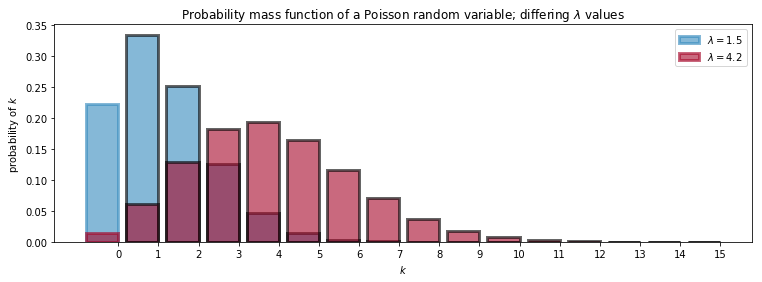

In [23]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628",]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")


plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")

### Continuous Case
Instead of a probability mass function, a continuous random variable has a *probability density function*. 

An example of continuous random variable is a random variable with **exponential density**. The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. 

This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data (measured in Kelvins, of course), or any other *precise and positive* variables. The graph below shows two probability density functions with different $\lambda$ values. 

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

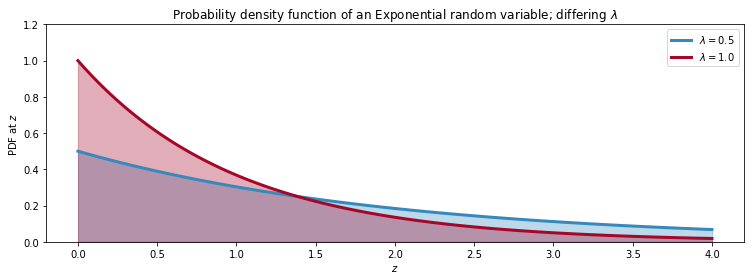

In [24]:
a = np.linspace(0, 4, 100)
expo = stats.expon

mean = [0.5, 1]

for l, c in zip(mean, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

### But what is $\lambda \;$?

**This question is what motivates statistics**. In the real world, $\lambda$ is hidden from us. We see only $Z$, and must go backwards to try and determine $\lambda$. The problem is difficult because there is no one-to-one mapping from $Z$ to $\lambda$. Many different methods have been created to solve the problem of estimating $\lambda$, but since $\lambda$ is never actually observed, no one can say for certain which method is best! 

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.

## The World Cup Problem: Germany v. Brazil
*Source: Allen Downey*

> In the 2014 FIFA World Cup, Germany played Brazil in a semifinal
> match.  Germany scored after 11 minutes and again at the 23 minute
> mark.  At that point in the match, how many goals would you expect
> Germany to score after 90 minutes?  What was the probability that they
> would score 5 more goals?

Scoring in games like soccer and hockey can be (reasonably) well modeled by a Poisson process, which assumes that each team, against a given opponent, will score goals at some goal-scoring rate, $\lambda$, and that this rate is stationary; in other words, the probability of scoring a goal is about the same at any point during the game.

Then, it can be shown that:

+ **If the average number of goals (goal scoring rate) in a game is $\lambda$, the distribution of goals per game is given by the Poisson PMF with parameter $\lambda$.**

+ **If goal-scoring is a Poisson process, the time between each pair of consecutive goals** (with mean ``time_per_game/average_number_goals``) **has an exponential distribution with parameter $\lambda$**. In other words,  the goal-scoring-rate has an exponential distribution with parameter $1/\lambda$.

Based on this modeling decision, we can answer the questions by

1. Defining a prior distribution for Germany's goal-scoring rate against Brazil,
2. Updating the prior based on the first two goals, and
3. Generating a predictive distribution for the number of goals they would score in the remaining minutes. 

We will use a probabilistic programming environment: ``pymc``.

PyMC is a python module that implements Bayesian statistical models and fitting algorithms. 

PyMC provides functionalities to make Bayesian analysis as painless as possible. Here is a short list of some of its features:

+ Fits Bayesian statistical models with Markov chain Monte Carlo and other algorithms.
+ Includes a large suite of well-documented statistical distributions.
+ Uses NumPy for numerics wherever possible.
+ Includes a module for modeling Gaussian processes.
+ Creates summaries including tables and plots.
+ Traces can be saved to the disk as plain text, Python pickles, SQLite or MySQL database, or hdf5 archives.
+ Several convergence diagnostics are available.

### Step 1: Constructing the prior

Before the game starts, what should we believe about Germany's goal-scoring rate against Brazil?  We could use previous tournament results to construct the prior $P(\lambda)$, but to keep things simple, I'll just use the average goal-scoring rate from all matches in the tournament, which was 2.67 goals per game (total for both teams).

The, we can construct a (exponential) prior where the mean matches the observed rate for a single team, 1.34 goals per game.

We will work in rates per minute to be able to give an answer to the questions.

In [25]:
import pymc as pm
%matplotlib inline
figsize(12,6)

avg_goals_per_minute = 1.34/90.
print('The average number of goals per minute is ', avg_goals_per_minute)

duration_of_game = 90.

#prior
lambda_ = pm.Exponential('lambda_', 1.0/avg_goals_per_minute)

The average number of goals per minute is  0.014888888888888889


We now generate a sample of $\lambda$ values from the exponential distribution.

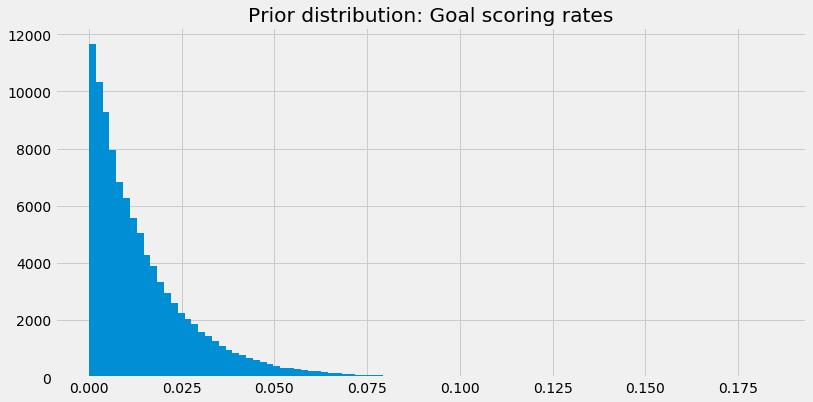

In [26]:
#samples from prior
goals_per_minute  = np.array([lambda_.random() for i in range(100000)])

with plt.style.context('fivethirtyeight'):
    plt.show()
    plt.hist(goals_per_minute, bins=100);
    plt.title('Prior distribution: Goal scoring rates');
plt.show()

Now we are able compute the histogram of goals per game per team from a Poisson distribution.

1.33315


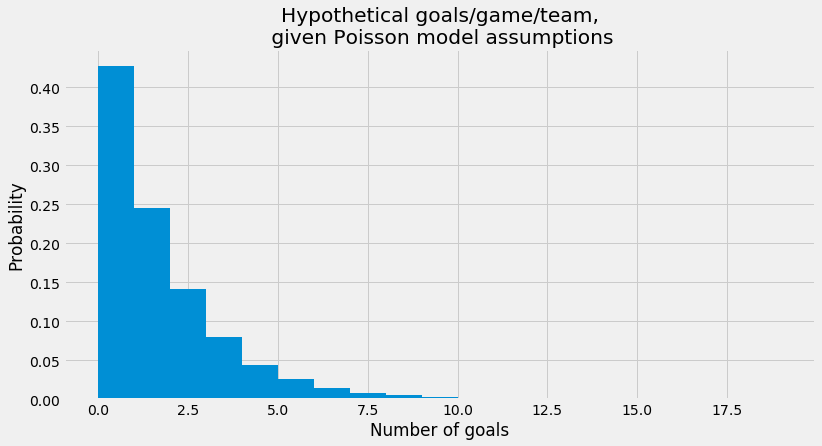

In [27]:
lambda2_ = duration_of_game*goals_per_minute
sample_points_per_team = np.random.poisson(lambda2_)

with plt.style.context('fivethirtyeight'):
    plt.hist(sample_points_per_team, bins=sample_points_per_team.max(), normed=True);
    plt.title('Hypothetical goals/game/team,\n given Poisson model assumptions')
    plt.ylabel('Probability')
    plt.xlabel('Number of goals');

print(sample_points_per_team.mean())

### Step 2: Updating

In this case we are given as data the inter-arrival time of the first two goals, 11 minutes and 12 minutes. We use the MCMC method to compute a posterior distribution for the rest of the game.

If we knew the actual goal scoring rate, $\lambda$, we could predict how many goals Germany would score in the remaining $t = 90-23$ minutes.  The distribution of goals would be Poisson with parameter $\lambda t$.

We don't actually know $\lambda$, but we can use the posterior distribution of $\lambda$, $P(\lambda | D)$, to generate a predictive distribution for the number of additional goals:

$$ P(\lambda | D) \approx P(\lambda)_{exp} P(D|\lambda)_{poi} $$

In [28]:
duration_between_goals = [11, 12]

# prior
avg_goals_per_minute = 1.34/90.
expected_duration_between_goals = 1.0/avg_goals_per_minute
lambda_ = pm.Exponential('lambda_', expected_duration_between_goals)

# connection of observed data with data generation process
obs = pm.Exponential('obs', lambda_, observed=True, value=duration_between_goals)

# likelihood
prediction = pm.Poisson('pred', (duration_of_game-23)*lambda_)

# computation of the posterior distribution (that is returned as a distribution)
mcmc = pm.MCMC([lambda_, obs, prediction])
mcmc.sample(25000,5000)

 [-----------------100%-----------------] 25000 of 25000 complete in 1.7 sec

We can recover the values of the posterior distribution of $\lambda$:

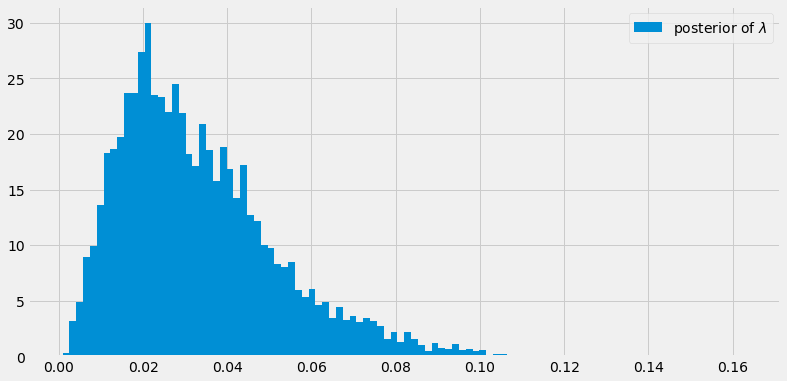

In [29]:
l_trace = mcmc.trace('lambda_')[:]

with plt.style.context('fivethirtyeight'):
    plt.hist(l_trace,bins=100, label="posterior of $\lambda$", normed=True);
    plt.legend(loc="upper right")

And also the posterior of the prediction:

2.2293


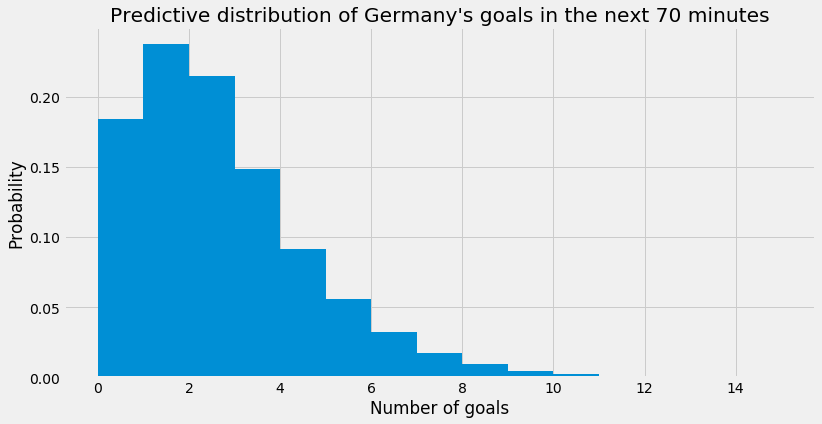

In [30]:
prediction_trace = mcmc.trace('pred')[:]
print(prediction_trace.mean())
with plt.style.context('fivethirtyeight'):
    plt.hist(prediction_trace,bins=max(prediction_trace), normed=True);
    plt.title("Predictive distribution of Germany's goals in the next 70 minutes")
    plt.ylabel('Probability')
    plt.xlabel('Number of goals');

In [31]:
(prediction_trace >= 5).mean()

0.12305000000000001

## Revisiting P-values.

In [32]:
import pymc as pm  
import numpy as np  
import pandas as pd
import seaborn

In [33]:
file = open('files/2002FemPreg.dat', 'r')


def chr_int(a):
    if a == '  ':
        return 0
    else:
        return int(a)
        
preg=[]
for line in file:
    lst  = [int(line[:12]), int(line[274:276]), int(line[276]), \
                 chr_int(line[277:279]), float(line[422:440])]
    preg.append(lst)
    
import pandas as pd
df = pd.DataFrame(preg)
df.columns = ['caseid', 'prglength', 'outcome', 'birthord', 'finalwgt']

#data cleaning
df2 = df.drop(df.index[(df.outcome == 1) & (df['prglength'] > df['prglength'].median() + 6)])
df2[(df2.outcome == 1) & (df2['prglength'] > df2['prglength'].median() + 6)]
df3 = df2.drop(df2.index[(df2.outcome == 1) & (df2['prglength'] < df2['prglength'].median() - 10)])
df3[(df3.outcome == 1) & (df3['prglength'] < df3['prglength'].median() - 10)]

firstbirth = df3[(df3.outcome == 1) & (df3.birthord == 1)]
othersbirth = df3[(df3.outcome == 1) & (df3.birthord >= 2)]

What we want to do is for two given populations, estimate the means ($\mu_1$ and $\mu_2$) and variances ($\sigma_1$ and $\sigma_2$) of the populations. 

Mathematically we want to find the posterior distribution, $P(\mu_1, \sigma_1, \mu_2, \sigma_2 |D)$.

Invoking Bayes Theorem we know:

$$  P(\mu_1, \sigma_1, \mu_2, \sigma_2 |D) = 
\frac{P(D|\mu_1, \sigma_1, \mu_2, \sigma_2 ) P(\mu_1, \sigma_1, \mu_2, \sigma_2 )}{P(D)} $$

With the posterior distribution we can compute the probability of $\mu_1 > \mu_2$ and other measures of interest like the differences in variance of the groups.

To keep the prior distribution of the mean broad, we use a Normal distribution centered in the pooled data mean with a standard deviation set to 1000 times the STD of the pooled data.

To model the prior distribution of the standard deviation we use a Uniform distribution.

In [34]:

group1 = firstbirth['prglength']
group2 = othersbirth['prglength']

# Generate Pooled Data
pooled = np.concatenate((group1,group2))

# Setup our priors
# In pymc, tau :  1/standard_deviation.

mu1 = pm.Normal("mu_1",mu=pooled.mean(), tau=1.0/pooled.var()/1000.0)
mu2 = pm.Normal("mu_2",mu=pooled.mean(), tau=1.0/pooled.var()/1000.0)

sig1 = pm.Uniform("sigma_1",lower=pooled.var()/1000.0,upper=pooled.var()*1000)
sig2 = pm.Uniform("sigma_2",lower=pooled.var()/1000.0,upper=pooled.var()*1000)

# Now we want to setup our posterior distributions. 
# Include our observed data into the model

t1 = pm.Normal("t_1",mu=mu1, tau=1.0/sig1, value=group1[:], observed=True)  
t2 = pm.Normal("t_2",mu=mu2, tau=1.0/sig2, value=group2[:], observed=True)  

# Push our priors into a model
model = pm.Model( [t1, mu1, sig1, t2, mu2, sig2] )

# Generate our MCMC object
mcmc = pm.MCMC(model)  

# Run MCMC sampler
mcmc.sample(40000,10000,2)

 [-----------------100%-----------------] 40000 of 40000 complete in 12.0 sec

So now we want to actually get the data out of it. The reason that we set string representations of each object in our model was so that we can pull out the results from our sampler like this:

In [35]:
mus1 = mcmc.trace('mu_1')[:]  
mus2 = mcmc.trace('mu_2')[:]  
sigmas1 = mcmc.trace('sigma_1')[:]  
sigmas2 = mcmc.trace('sigma_2')[:]  

We are sampling the distribution of our parameters, not computing them exactly. The result is that we have a measure of confidence on where we think a parameter should be. This allows us to do things like compute the distributions of parameters and the distributions of their differences.

The most interesting metrics for this test are the following:

In [36]:
diff_mus = mus1-mus2  
diff_sigmas = sigmas1-sigmas2  
effect_size = (mus1-mus2)/np.sqrt((sigmas1**2+sigmas2**2)/2.) 

We can calculate estimates of parameters using the expectation of their posteriors. So for estimating our means we can just take the means of our traces above:

In [37]:

print("mu_1", mus1.mean())
print("mu_2", mus2.mean())

mu_1 38.7613544785
mu_2 38.6583108435


How confidence are we in these values? We can plot the kernel densities of our parameters to see exactly what the probability of a given value is. In IPython we just do the following:

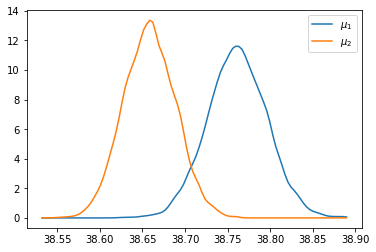

In [38]:
%matplotlib inline 
from scipy.stats import gaussian_kde 
import matplotlib.pylab as plt
# plt.figsize(16,9)

# prepare plotting area to fit both graphs
minx = min(min(mus1),min(mus2))  
maxx = max(max(mus1),max(mus2))  
# x values to plot on
xs = np.linspace(minx,maxx,100)

# generate density estimates
gkde1 = gaussian_kde(mus1)  
gkde2 = gaussian_kde(mus2)

# draw plots
plt.plot(xs,gkde1(xs),label='$\mu_1$')  
plt.plot(xs,gkde2(xs),label='$\mu_2$')  
plt.legend()  
plt.show()  

We have our estimates and we have distributions for them, let's see what questions we can answer and how certain we are about our answers.

In statistics the common way to go about answering a question is hypothesis testing, and since we're working in the Bayesian framework, we will be doing Bayesian Testing.

Suppose we want to analyze the following hypotheses: ($H_0:\mu_1 \geq \mu_2$) vs ($H_1:\mu_1  < \mu_2$). 

To test the null hypothesis we need to estimate $P(\mu_1−\mu_2 > 0|D)$, which is easily computed because we've already computed the distribution of $\mu_1−\mu_2$. 

All we have left to do is compute the probability from our samples that $H_0$ is true, i.e. our 'p-value' is generated by:

In [39]:
diff_mus = mus1-mus2  
p = (diff_mus > 0.0).mean()  
print(p)

0.9864


Similarly we do the complement of this to test whether $H_1$ is true. 

In [40]:
p = (diff_mus < 0.0).mean()  
print(p)

0.0136


We can visualize this probability through the following:

In [41]:
p = (diff_mus>0).mean()  
print(p)

0.9864


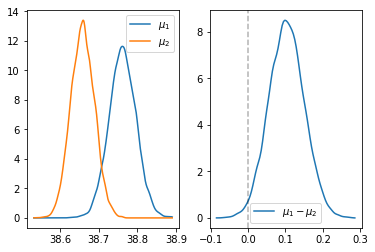

In [42]:
plt.subplot(121)

minx = min(min(mus1),min(mus2))  
maxx = max(max(mus1),max(mus2))  
xs = np.linspace(minx,maxx,1000)

gkde1 = gaussian_kde(mus1)  
gkde2 = gaussian_kde(mus2)

plt.plot(xs,gkde1(xs),label='$\mu_1$')  
plt.plot(xs,gkde2(xs),label='$\mu_2$')  
plt.legend()

plt.subplot(122)

minx = min(diff_mus)  
maxx = max(diff_mus)  
xs = np.linspace(minx,maxx,100)  
gkde = gaussian_kde(diff_mus)

plt.plot(xs,gkde(xs),label='$\mu_1-\mu_2$')  
plt.legend()

plt.axvline(0, color='#000000',alpha=0.3,linestyle='--')

plt.show()

## Example: Inferring behaviour from text-message data.

> You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this? (This is in fact my own text-message data. Judge my popularity as you wish.)


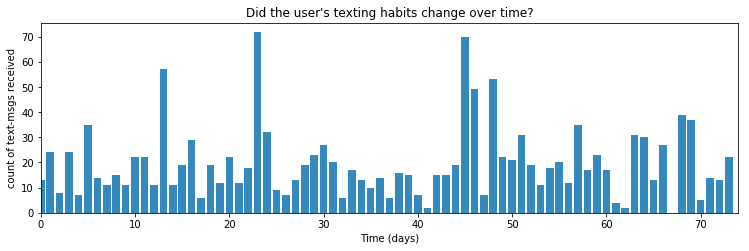

In [43]:
figsize(12.5, 3.5)
count_data = np.loadtxt("files/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

 [-----------------100%-----------------] 40000 of 40000 complete in 5.2 sec

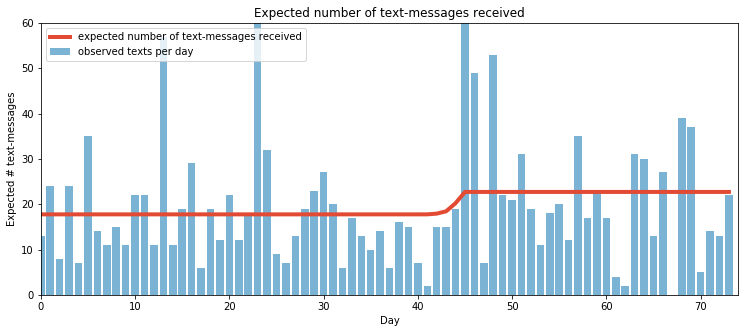

In [44]:
import pymc as pm

alpha = 1.0 / count_data.mean()  # Recall count_data is the
                               # variable that holds our txt counts
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

More information: [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

